Aim:

PERFORM GAUSSIAN MIXTURE MODEL ON TWO DIFFERENT DATASETS AND ANALYSE ITS PERFORMANCE. 

Algorithm:

Gaussian Mixture Model (GMM) is a probabilistic model used for clustering. It assumes that the data is generated from a mixture of several Gaussian distributions, each representing a cluster. GMM works by estimating the parameters (mean, covariance, and weight) of these Gaussian distributions using the Expectation-Maximization (EM) algorithm. The model alternates between assigning data points to clusters (based on probabilities) and updating the parameters of the distributions. Unlike K-means, which assigns each point to exactly one cluster, GMM assigns probabilities to each point belonging to each cluster, allowing for softer, more flexible cluster boundaries.

Code:



In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [25]:
df = pd.read_csv("Mall_Customers.csv")

In [26]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
objectcolumns = []
for i in df.columns:
    if df[i].dtype == "object":
        objectcolumns.append(i)
    
print(objectcolumns)

['Gender']


In [28]:
encoder = LabelEncoder()
for i in objectcolumns:
    df[i] = encoder.fit_transform(df[i])

In [29]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [30]:
gmm = GaussianMixture(n_components=14, random_state=42)
gmm.fit(df)

GaussianMixture(n_components=14, random_state=42)

In [31]:
labels = gmm.predict(df)

df['Cluster'] = labels

In [32]:
print("\nMall Customers with Cluster Labels:")
print(df.head())


Mall Customers with Cluster Labels:
   CustomerID    Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0   -1.723412  1.128152 -1.424569           -1.738999               -0.434801   
1   -1.706091  1.128152 -1.281035           -1.738999                1.195704   
2   -1.688771 -0.886405 -1.352802           -1.700830               -1.715913   
3   -1.671450 -0.886405 -1.137502           -1.700830                1.040418   
4   -1.654129 -0.886405 -0.563369           -1.662660               -0.395980   

   Cluster  
0        4  
1        4  
2        2  
3       11  
4        2  


In [33]:
silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.567933383583968


Dataset 2


GMM Silhouette Score: 0.4751434694267145
GMM AIC: 708.7225963565597
GMM BIC: 841.190549296795


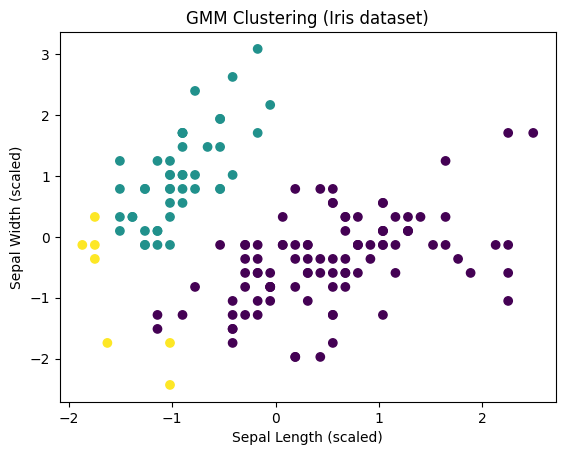

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

gmm = GaussianMixture(n_components=3, random_state=42)  # We know there are 3 species in the Iris dataset
gmm.fit(data_scaled)

labels_gmm = gmm.predict(data_scaled)

silhouette_gmm = silhouette_score(data_scaled, labels_gmm)

aic = gmm.aic(data_scaled)
bic = gmm.bic(data_scaled)

print(f'GMM Silhouette Score: {silhouette_gmm}')
print(f'GMM AIC: {aic}')
print(f'GMM BIC: {bic}')

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_gmm, cmap='viridis')
plt.title('GMM Clustering (Iris dataset)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.show()



Result:

Gaussian Mixture Model has been performed on two datasets and their performance has been analysed